In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tools.ImageOperate import hist_cut, hist_remap, clahe_equalize, pyrdown, pyrdown_multithread

Function pyrdown_multithread took 4.510ms to run
(687, 960, 3)


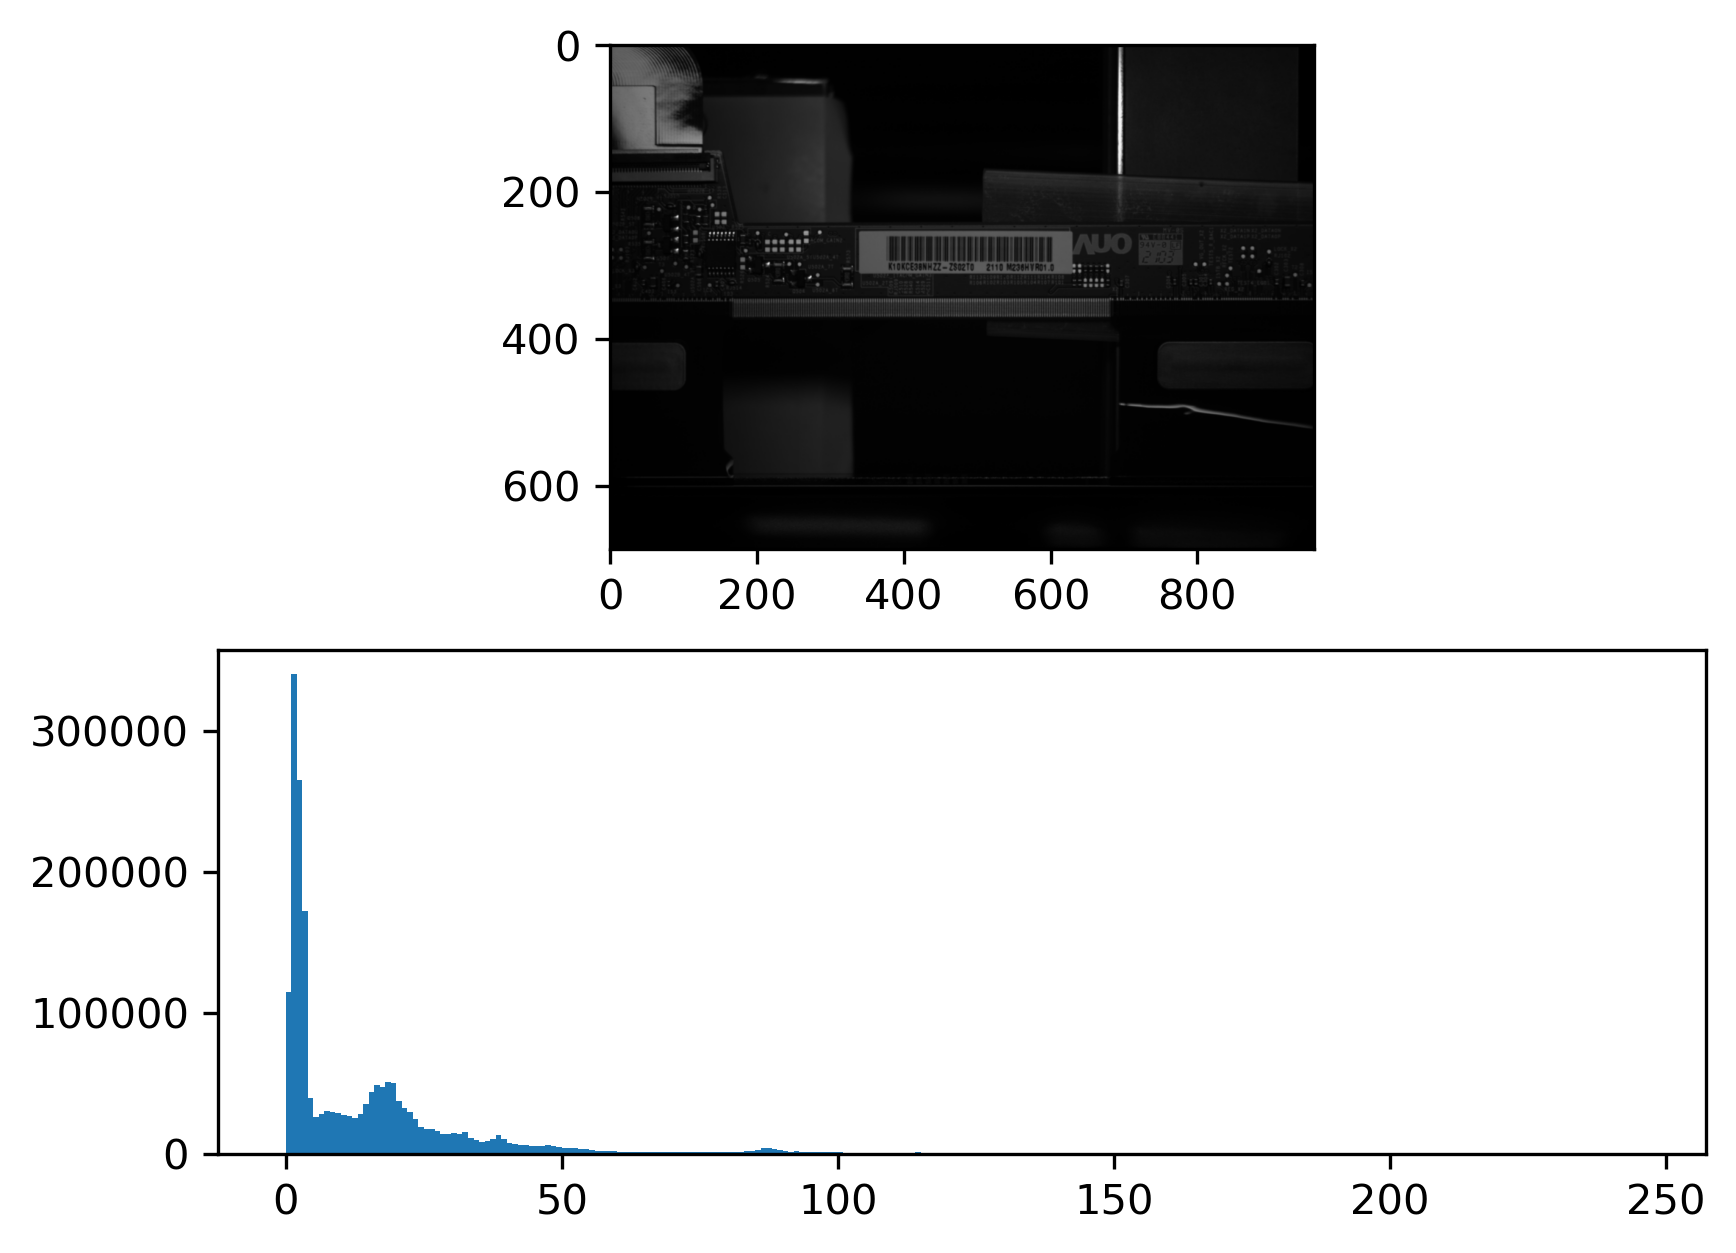

In [14]:
file = r"D:\Fenkx\Fenkx - General\AI\Dataset\BarCode\My Datasets\Factory\2.tif"
image_source = cv2.imdecode(np.fromfile(file, dtype=np.uint8), 1)
image_pydown = pyrdown_multithread(image_source)
print(image_pydown[-1].shape)
plt.figure(dpi=300)
plt.subplot(2, 1, 1)
plt.imshow(image_pydown[-1])
plt.subplot(2, 1, 2)
plt.hist(image_pydown[-1].ravel(), np.max(image_pydown[-1]), [0, np.max(image_pydown[-1])])
plt.show()

In [ ]:
    # 灰度化
gray = cv2.cvtColor(image_pydown[-1], cv2.COLOR_BGR2GRAY)
# Scharr算子检测x和y方向梯度
scharr_x = cv2.Scharr(gray, cv2.CV_64F, 1, 0, borderType=cv2.BORDER_ISOLATED)
scharr_y = cv2.Scharr(gray, cv2.CV_64F, 0, 1, borderType=cv2.BORDER_ISOLATED)

# 将梯度值做差
diff_gradient = cv2.subtract(scharr_x, scharr_y)
diff_gradient = cv2.convertScaleAbs(diff_gradient)

# 归一化到0至255作为像素值
norm_diff_gradient = cv2.normalize(diff_gradient, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

plt.figure(dpi=300)
plt.imshow(norm_diff_gradient, 'gray')
plt.show()

In [ ]:

# 形态学开运算去除白色杂点
kernel = np.ones((3, 3), np.uint8)
opening_norm_diff_gradient = cv2.morphologyEx(norm_diff_gradient, cv2.MORPH_OPEN, kernel, iterations=3)
diff_gray = cv2.subtract(gray, opening_norm_diff_gradient)
plt.figure(dpi=300)
plt.imshow(diff_gray, 'gray')
plt.show()

In [ ]:
image_cut = hist_cut(image_pydown[-1], 600)
plt.figure(dpi=300)
plt.subplot(2, 1, 1)
plt.imshow(image_cut)
plt.subplot(2, 1, 2)
plt.hist(image_cut.ravel(), np.max(image_cut), [0, np.max(image_cut)])
plt.show()

In [ ]:
# Contrast stretching
# equ = cv2.normalize(image_cut, None, 0, 255, cv2.NORM_MINMAX)

# Gamma correction
gamma = np.log(255) / np.log(np.max(image_cut))
equ = np.power(image_cut, gamma).astype(np.uint8)

# 绘制原始图像的灰度直方图和更改分布后的灰度直方图
plt.figure(dpi=200)
plt.subplot(2, 2, 1)
plt.hist(image_cut.ravel(), np.max(image_cut), [0, np.max(image_cut)])
plt.subplot(2, 2, 2)
plt.hist(equ.ravel(), np.max(equ), [0, np.max(equ)])

plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(image_cut, cv2.COLOR_BGR2RGB))
plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(equ, cv2.COLOR_BGR2RGB))
plt.show()


In [ ]:
from location.LineCluster import find_barcode_by_cluster, draw_clusters

clusters = find_barcode_by_cluster(equ, 100)
image_drawed = draw_clusters(equ, clusters)
plt.figure(dpi=300)
plt.imshow(cv2.cvtColor(image_drawed, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
# Adaptive histogram equalization:
# Load the image
path = r'D:\Fenkx\Fenkx - General\AI\Dataset\BarCode\My Datasets\Factory'
result_path = r'C:\Users\fy.xie\Desktop\temp\image_equ'
for index, item in enumerate(os.listdir(path)):
	file = os.path.join(path, item)
	if os.path.isfile(file):
		image_source = cv2.imdecode(np.fromfile(file, dtype=np.uint8), 1)
		try:
			image_pydown = pyrdown_multithread(image_source)
			image_cut = hist_cut(image_pydown[-1], 500)
			gamma = np.log(255) / np.log(np.max(image_cut))
			equ = np.power(image_cut, gamma).astype(np.uint8)
		finally:
			# result_path = os.path.join(path, 'image_equ')
			if not os.path.exists(result_path):
				os.makedirs(result_path)
			cv2.imwrite(os.path.join(result_path, item), equ)
print('finished!')
